$Problem\:1$
$$\frac{dy(t)}{dt} = -y(t) +1$$
$$y(0)=1$$

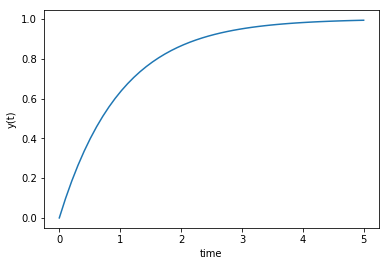

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t):
    dydt = -y + 1.0
    return dydt

# initial condition
y0 = 0

# time points
t = np.linspace(0,5)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

$Problem\:2$
$$5\frac{dy(t)}{dt} = -y(t) + u(t)$$
$$y(0)=1$$
$$u \:steps\: from\: 0\: to\: at\: t=10$$

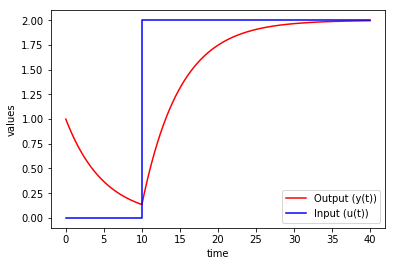

In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t):
    # u steps from 0 to 2 at t=10
    if t<10.0:
        u = 0
    else:
        u = 2
    dydt = (-y + u)/5.0
    return dydt

# initial condition
y0 = 1

# time points
t = np.linspace(0,40,1000)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y,'r-',label='Output (y(t))')
plt.plot([0,10,10,40],[0,0,2,2],'b-',label='Input (u(t))')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

$Problem\:3$
$$\frac{dx(t)}{dt} = 3{e}^{-t}$$
$$\frac{dy(t)}{dt} = 3-y(t)$$
$$y(0)=0$$
$$x(0)=0$$

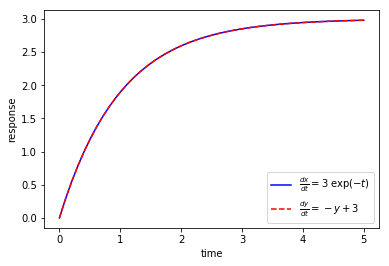

In [8]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(z,t):
    dxdt = 3.0 * np.exp(-t)
    dydt = -z[1] + 3
    dzdt = [dxdt,dydt]
    return dzdt

# initial condition
z0 = [0,0]

# time points
t = np.linspace(0,5)

# solve ODE
z = odeint(model,z0,t)

# plot results
plt.plot(t,z[:,0],'b-',label=r'$\frac{dx}{dt}=3 \; \exp(-t)$')
plt.plot(t,z[:,1],'r--',label=r'$\frac{dy}{dt}=-y+3$')
plt.ylabel('response')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

$Problem\:4$
$$2\frac{dx(t)}{dt} = -x(t) + u(t)$$
$$5\frac{dy(t)}{dt} = -y(t) + x(t)$$
$$u=2S(t-5),x(0)=0,y(0)=0$$
$$where\: S(t−5)\:is\: a\: step\: function\: that\: changes\: from\: zero\: to\: one\: at\: t=5.\: When \:it\: is\: multiplied\: by\: two,\: it\: changes\: from\: zero\: to\: two\: at\: that\: same\: time,\: t=5.$$

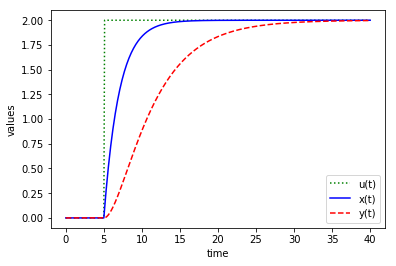

In [10]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(z,t,u):
    x = z[0]
    y = z[1]
    dxdt = (-x + u)/2.0
    dydt = (-y + x)/5.0
    dzdt = [dxdt,dydt]
    return dzdt

# initial condition
z0 = [0,0]

# number of time points
n = 401

# time points
t = np.linspace(0,40,n)

# step input
u = np.zeros(n)
# change to 2.0 at time = 5.0
u[51:] = 2.0

# store solution
x = np.empty_like(t)
y = np.empty_like(t)
# record initial conditions
x[0] = z0[0]
y[0] = z0[1]

# solve ODE
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(u[i],))
    # store solution for plotting
    x[i] = z[1][0]
    y[i] = z[1][1]
    # next initial condition
    z0 = z[1] 

# plot results
plt.plot(t,u,'g:',label='u(t)')
plt.plot(t,x,'b-',label='x(t)')
plt.plot(t,y,'r--',label='y(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()